In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
data = pd.read_csv('salary_data.csv')


In [3]:
# Prepare the independent (X) and dependent (y) variables
X = data[['YearsExperience']].values  # Independent variable (2D array)
y = data['Salary'].values  # Dependent variable (1D array)

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Create Polynomial Features
poly = PolynomialFeatures(degree=3)  # Degree can be adjusted for curve fitting
X_poly = poly.fit_transform(X_train)

# Create and train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

LinearRegression()

In [8]:
# Predict the values
y_poly_pred = model_poly.predict(poly.transform(X_test))
print(y_poly_pred)

[ 44123.26560754 101388.84383696  67765.52085423  75847.05332616
  51132.59452555  58759.85325559]


In [13]:
# Predict salary based on user input
def predict_salary():
    years_exp = float(input("Enter years of experience: "))
    salary_pred = model_poly.predict(poly.transform([[years_exp]]))  # Predict salary
    print(f"Predicted Salary for {years_exp} years of experience: {salary_pred[0]:.2f}")

# Call the prediction function
predict_salary()

Predicted Salary for 7.5 years of experience: 90038.27


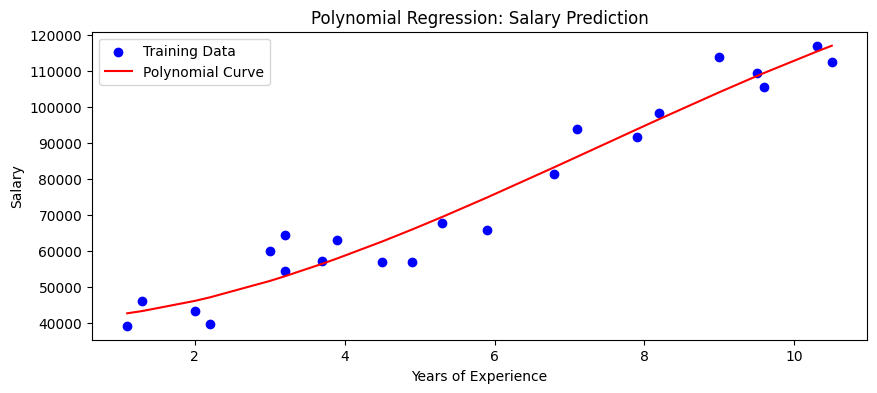

In [23]:
# Plotting the Polynomial Regression curve
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, color='blue', label='Training Data')  # Training data points
#plt.scatter(X_test, y_test, color='green', label='Test Data')  # Test data points

# Plot the Polynomial curve (sorted for a smooth line)
plt.plot(np.sort(X_train, axis=0), model_poly.predict(poly.transform(np.sort(X_train, axis=0))), color='red', label='Polynomial Curve')

# Adding the titles and labels
plt.title('Polynomial Regression: Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show the legend to differentiate between data points and curve
plt.legend()

# Show the plot
plt.show()